## Import Necessary Libraries

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
%pip show tensorflow

Name: tensorflow
Version: 2.16.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: tensorflow-serving-api
Note: you may need to restart the kernel to use updated packages.


## Model Loading

In [160]:
# Load the saved model
model = tf.keras.models.load_model("trained_cnn_model.keras", compile=False, safe_mode=True)

In [162]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,685,526 (59.84 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,842,764 (29.92 MB)

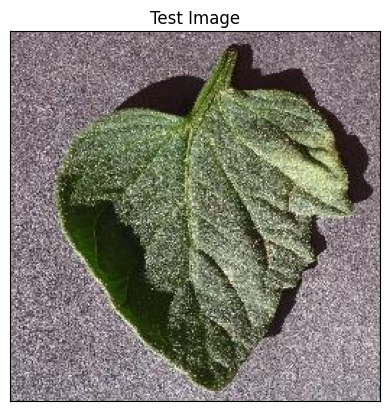

In [164]:
image_path = "test/test/TomatoHealthy1.JPG"

#Read Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)       #Conver BGR image to RGB

#Display the image
plt.imshow(img)
plt.title("Test Image")
#plt.axis("off")  --> it even removes the box aroud the image
plt.xticks([])
plt.yticks([])
plt.show()

## Test the Model

In [166]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)

In [168]:
print(input_arr)

[[[157. 144. 153.]
  [ 89.  76.  85.]
  [159. 146. 155.]
  ...
  [158. 143. 150.]
  [140. 125. 132.]
  [140. 125. 132.]]

 [[149. 136. 145.]
  [159. 146. 155.]
  [ 79.  66.  75.]
  ...
  [115. 100. 107.]
  [126. 111. 118.]
  [104.  89.  96.]]

 [[186. 173. 182.]
  [136. 123. 132.]
  [145. 132. 141.]
  ...
  [135. 120. 127.]
  [104.  89.  96.]
  [114.  99. 106.]]

 ...

 [[176. 169. 177.]
  [179. 172. 180.]
  [150. 143. 151.]
  ...
  [144. 137. 144.]
  [157. 150. 157.]
  [150. 143. 150.]]

 [[ 81.  74.  82.]
  [163. 156. 164.]
  [170. 163. 171.]
  ...
  [162. 155. 162.]
  [120. 113. 120.]
  [150. 143. 150.]]

 [[125. 118. 126.]
  [178. 171. 179.]
  [ 90.  83.  91.]
  ...
  [163. 156. 163.]
  [181. 174. 181.]
  [206. 199. 206.]]]


In [170]:
#Convert single image to a batch because the model has been train in batch
input_arr = np.array([input_arr]) 
print(input_arr.shape)

(1, 128, 128, 3)


In [80]:
# input_arr = np.squeeze(input_arr, axis=0)  # Removes the batch dimension
# print(input_arr.shape)  # Check the shape

(1, 128, 128, 3)


In [172]:
prediction = cnn.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


(array([[3.45726556e-16, 1.93907017e-15, 4.66979301e-15, 3.06214852e-13,
         7.81437445e-16, 1.90229100e-11, 1.52974018e-16, 8.63982606e-17,
         6.49696966e-19, 6.68571906e-17, 9.22625238e-16, 2.09184516e-19,
         4.63905420e-17, 5.07877183e-21, 5.99456880e-18, 8.50791397e-19,
         5.65745415e-17, 1.92378735e-17, 1.08107518e-17, 9.05591114e-17,
         2.52259880e-14, 1.29340384e-17, 1.49912702e-14, 1.21677060e-17,
         6.41108068e-16, 1.04057474e-09, 2.05206246e-15, 1.36968256e-15,
         6.80057342e-16, 3.33873680e-16, 4.42417387e-11, 1.93469074e-13,
         8.27660585e-13, 1.79216353e-15, 9.19057896e-09, 1.12894427e-18,
         1.60791272e-16, 1.00000000e+00]], dtype=float32),
 (1, 38))

In [174]:
result_index=np.argmax(prediction)
result_index

37

In [176]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

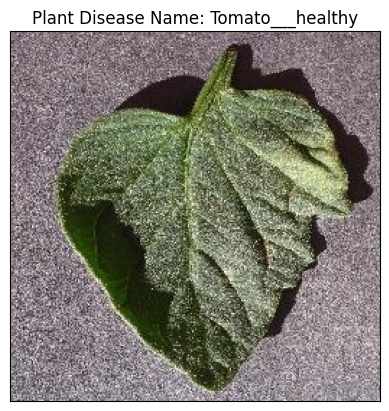

'Tomato___healthy'

In [178]:
#Display the result of plant disease
model_prediction = class_name[result_index]
#Display the image
plt.imshow(img)
plt.title(f"Plant Disease Name: {model_prediction}")
#plt.axis("off")  --> it even removes the box aroud the image
plt.xticks([])
plt.yticks([])
plt.show()
model_prediction

## Lets try the second prediction

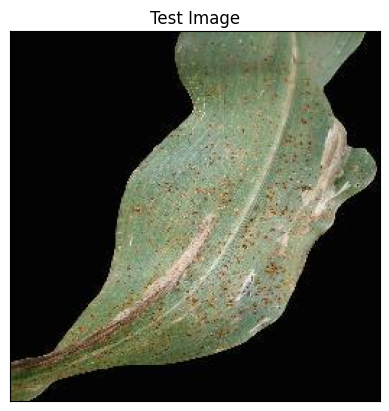

In [98]:
# image_path = "test/test/CornCommonRust1.JPG"

# #Read Image
# img = cv2.imread(image_path)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)       #Conver BGR image to RGB

# #Display the image
# plt.imshow(img)
# plt.title("Test Image")
# #plt.axis("off")  --> it even removes the box aroud the image
# plt.xticks([])
# plt.yticks([])
# plt.show()

In [18]:
# image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
# input_arr = tf.keras.preprocessing.image.img_to_array(image)

# #Convert single image to a batch
# input_arr = np.array([input_arr]) 
# print(input_arr.shape)

(1, 128, 128, 3)


In [19]:
# prediction = cnn.predict(input_arr)
# prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


(array([[3.3001575e-13, 3.8257734e-14, 1.1064710e-17, 2.8806945e-17,
         3.2019658e-14, 4.1731666e-17, 1.1779144e-15, 5.0924231e-15,
         9.9999189e-01, 8.5897069e-17, 1.4914969e-14, 7.6370051e-20,
         5.9841673e-19, 2.3853275e-19, 3.1880027e-19, 2.7462926e-18,
         2.6603799e-16, 4.4207666e-21, 3.1971401e-13, 1.6051190e-14,
         1.9071791e-12, 9.5499036e-21, 6.0609059e-17, 4.7820107e-22,
         9.5972752e-20, 1.3035817e-18, 3.5047035e-19, 9.2685969e-20,
         2.2820183e-17, 4.8041775e-12, 8.1161370e-06, 1.5234450e-15,
         1.8951258e-12, 1.1064725e-22, 1.8494734e-17, 9.2488131e-21,
         3.1786247e-21, 8.9456632e-16]], dtype=float32),
 (1, 38))

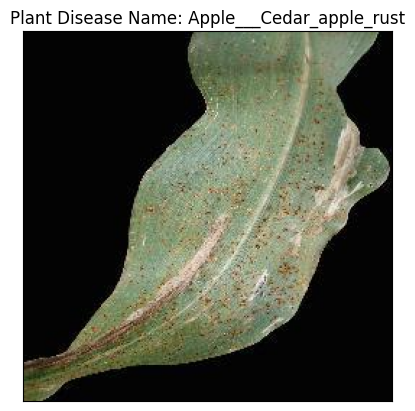

'Apple___Cedar_apple_rust'

In [100]:
# result_index=np.argmax(prediction)
# result_index

# #Display the result of plant disease
# model_prediction = class_name[result_index]
# #Display the image
# plt.imshow(img)
# plt.title(f"Plant Disease Name: {model_prediction}")
# #plt.axis("off")  --> it even removes the box aroud the image
# plt.xticks([])
# plt.yticks([])
# plt.show()
# model_prediction